# Homework 2: Numpy, Scipy, and Matplotlib

**Intructions**

In this problem set, we'll be learning the basics of Numpy, Scipy, and Matplotlib.

A blank code or markup cell will be left after each exercise for you to fill in with your solution.

I've completed the first few exercises for you to show you how you should format your HW submission.

## Import Necessary Modules

You should always start you file with all of the `import` statements that you will be using for the file. This makes it easier to quickly check what modules each file depends on---all you have to do is look at the top of the file. 

For this problem, import numpy, scipy, and the pyplot submodule from matplotlib.

In [1]:
# Completed for you

import numpy as np
import pandas as pd
import scipy
import scipy.integrate
import scipy.stats
from scipy import misc
from scipy.optimize import minimize
from matplotlib import pyplot as plt
import scipy.integrate
import scipy.stats

## Q1. Use built-in Numpy functions to do the following tasks

1. Create a vector (numpy array) of size 10 that contains all zeros and print it. (Use np.zeros.)
2. Use `arange` to create a vector of values from 5 to 24. Print it.
3. Use `arange` and Python "slicing" to create a vector of values from 24, to 5. Print it.
4. Use `arange` and Python "slicing" to create a vector consisting of all the even integers in the half-open interval $[0,30)$.
5. Use `arange` and `reshape` to create a 3x3 numpy array containing the numbers 0 to 8.

In [2]:
# Completed for you

# 1
print("1.")
Z = np.zeros(10)
print(Z)

# 2
print("2.")
print(np.arange(5,25))

# 3
print("3.")
z = np.arange(5, 25)
print(z[::-1])

# 4
print("4.")
z = np.arange(0,30)
print(z[::2])

# 5
print("5.")
print(np.arange(0,9).reshape((3,3)))

1.
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
2.
[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]
3.
[24 23 22 21 20 19 18 17 16 15 14 13 12 11 10  9  8  7  6  5]
4.
[ 0  2  4  6  8 10 12 14 16 18 20 22 24 26 28]
5.
[[0 1 2]
 [3 4 5]
 [6 7 8]]


## Q2. Numpy functions continued... (2 points each)

1. Use `eye` to create a 5x5 identity matrix. Print it.
2. Use `random.random` to generate a 3x3x3 array of numbers randomly generated from a uniform distribution over the support interval $[0,1)$. Print it.
3. Create a 10x10 array with similarly generated random values. Find and print the minimum and maximum values appearing in the matrix using `min` and `max`.
4. Create a random vector of size 30. Find and print the mean value.
5. Use `zeros` and/or `ones` and slicing to create a 10x10 array with 1's on the border and 0's inside.

In [3]:
# TODO
print("1.")
print(np.eye(5))

print("2.")
print(np.random.random((3,3,3)))

print("3.")
Z = np.random.random((10,10))
print(f"The minumum value is {Z.min()}, and the maximum {Z.max()}")

print("4.")
Z = np.random.random(30)
print(f"The mean is {Z.mean()}")

print("5.")
Z = np.ones((10,10))
Z[1:-1,1:-1] = 0
print(Z)

1.
[[1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1.]]
2.
[[[0.57616005 0.75436145 0.5799082 ]
  [0.37239279 0.08611424 0.03184849]
  [0.24203101 0.13635131 0.19374531]]

 [[0.493796   0.98267663 0.82809505]
  [0.85374195 0.96048339 0.43404725]
  [0.56844152 0.40127502 0.81591388]]

 [[0.43014918 0.61504966 0.32046229]
  [0.69813125 0.84915397 0.02746046]
  [0.96849873 0.82487212 0.7002977 ]]]
3.
The minumum value is 0.0037412486139882795, and the maximum 0.9948563641187163
4.
The mean is 0.527401892258659
5.
[[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]]


## Q3. Integration with Scipy (2 points)

 - (1) The PDF of a Normal distibution is 
 $$
f(x; \mu, \sigma) =  \frac{1}{\sqrt{2 \pi \sigma^2}} \exp\left\{- \frac{(x - \mu)^2}{2 \sigma^2}\right\}
 $$
 
 Let $\mu = 1$ and $\sigma = 2$. Use Scipy to numerical integrate this function. Specifically, calculate
 $$
 \int_{-2}^{2} f(x; \mu, \sigma) \mathrm d x
 $$
 
 Verify your result using the built-in function for the CDF of a normal distribution: `scipy.stats.norm.cdf(x, loc=mu, scale=sigma)`. To calculate the proper area as the integral above, you will need to compute
 $$
 F(2) - F(-2),
 $$
 where $F$ is the CDF of the normal with mean 1 and standard deviation 2.
 
 (Hint: You will need to import `scipy.integrate` and `scipy.stats` to access the functions that you need.)

In [4]:
mu = 1
sigma = 2 

def f(x):
    constant = 1/(np.sqrt(2 * np.pi * sigma**2))
    integrand = constant * np.exp(-(x-mu)**2/(2*sigma**2))
    return integrand

In [5]:
a = 2
b = -2

res, err = scipy.integrate.quad(f, a, b)
res

-0.6246552600051551

In [6]:
(scipy.stats.norm.cdf(b, loc=1, scale=2) - 
 scipy.stats.norm.cdf(a, loc=1, scale=2) )

np.float64(-0.624655260005155)

## Q4. Array Indexing with an Image (4 points)

Run the code in the cell below to access a matrix called `face`. Print the matrix to get an idea of what it looks like. What is its dimensions?

In [7]:
from scipy import misc
face = misc.face(gray=True).astype('float64')

/var/folders/8m/h9p4w9xx385dnwz_x2453dyc0000gn/T/ipykernel_38384/127514662.py:2: DeprecationWarning: scipy.misc.face has been deprecated in SciPy v1.10.0; and will be completely removed in SciPy v1.12.0. Dataset methods have moved into the scipy.datasets module. Use scipy.datasets.face instead.
  face = misc.face(gray=True).astype('float64')


In [8]:
# TODO
face
face.shape

(768, 1024)

Use the following code to plot the elements of the matrix as an image: `plt.imshow(face, cmap=plt.cm.gray)`

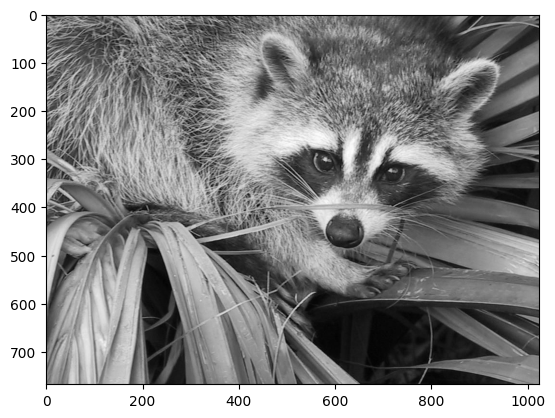

In [9]:
# TODO
plt.imshow(face, cmap=plt.cm.gray)

Now, apply the function `np.sin(x/25)` to the face matrix and then plot it again. This doesn't do anything very deep, it just messes with the shades of gray in a nonlinear way.

Note: Do not permanently alter the `face` matrix with this transformation. If you wish, you may create a new matrix called `face_sine`, but you don't need to. We won't be using this transformed matrix after this step. This was just for practice.

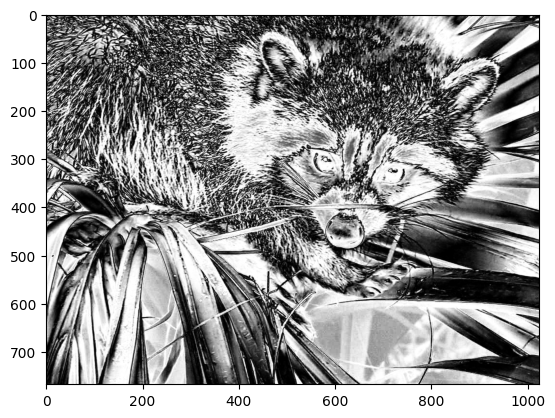

In [10]:
# TODO
plt.imshow(np.sin(face/25), cmap=plt.cm.gray)

Imagine a circle with a center at the matrix indices (300, 620) and a radius of 250. In the x-y plane, this would be 620, 300. Write a snippet of code that, for each pixel, calculates the distance of that pixel from the center of this circle. If the distance is greater than the radius of the circle, set the value of the pixel (the element of the matrix) equal to zero. Plot the result, again using `plt.ishow` with a gray colormap.

Be sure to create a new copy of the `face` matrix, `face2`. Create a proper copy using the `copy` method of the `np.array` class.

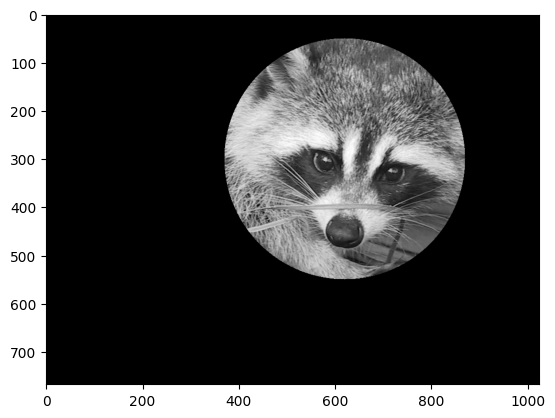

In [11]:
# TODO: Finish the following code.

face2 = face.copy()
cx, cy = 620, 300
radius = 250
for i in range(face.shape[0]):
    for j in range(face.shape[1]):        
        # TODO: Your code here
        distance = np.sqrt((cx - j)**2 + (cy - i)**2)
        if distance > radius:
            face2[i, j] = 0
        pass
        
plt.imshow(face2, cmap=plt.cm.gray)

## Q5. Fitting a Curve to Data (2 points for each part)

In this exercise, you will fit a nonlinear curve to data by minimizing the sum of squares. Below, I have given data and a function to plot the data and a curve over the data. The curve is the following function:
$$
y(t) = x_0 \exp(-x_2 t) + x_1 \exp(-x_3 t).
$$

In [12]:
from scipy.optimize import minimize
data = np.array(
  [[0.0000, 5.8955], 
   [0.1000, 3.5639],
   [0.2000, 2.5173],
   [0.3000, 1.9790],
   [0.4000, 1.8990],
   [0.5000, 1.3938],
   [0.6000, 1.1359],
   [0.7000, 1.0096],
   [0.8000, 1.0343],
   [0.9000, 0.8435],
   [1.0000, 0.6856],
   [1.1000, 0.6100],
   [1.2000, 0.5392],
   [1.3000, 0.3946],
   [1.4000, 0.3903],
   [1.5000, 0.5474],
   [1.6000, 0.3459],
   [1.7000, 0.1370],
   [1.8000, 0.2211],
   [1.9000, 0.1704],
   [2.0000, 0.2636]])

def plot_against_data(x):
    tgrid = data[:,0]
    ydata = data[:,1]
    yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
    y = yfunc(tgrid)
    plt.plot(tgrid, ydata, '.')
    plt.plot(tgrid, y)
    
x_initial = np.array([1, 1, 1, 0])

 - (1): Use the given plotting function to plot the data and the curve for the given initial guess of the parameters, `x_initial`.

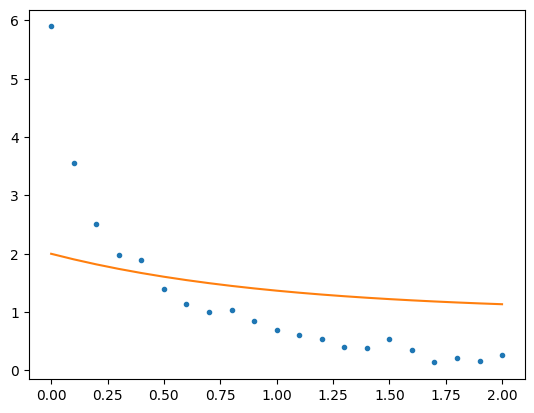

In [43]:
# TODO
plot_against_data(x_initial)

 - (2) Write a function called `sum_squares` that takes in a vector of model paraters (e.g., `x_initial`) and returns the sum of squares that results from the difference of the data and the curve defined by `x_initial`. What is the sum of squares that results from the given `x_initial`?

In [44]:
# TODO
def sum_squares(x):
    tgrid = data[:,0]
    ydata = data[:,1]
    yfunc = lambda t: x[0] * np.exp(-x[2]* t) + x[1] * np.exp(-x[3] * t)
    y = yfunc(tgrid)
    sum = np.sum((y-ydata) ** 2)
    return sum



In [45]:
sum_squares(x_initial)

np.float64(27.432326688864467)

 - (3) Use `scipy.optimize.minimize` to minimize the sum of squares, using the function that you wrote previously. Save the optimal parameters to the variable `xstar`.

In [46]:
# TODO
opt = minimize(sum_squares, x_initial)
xstar = opt.x
xstar

array([ 3.00689938,  2.88903273, 10.58641867,  1.40031744])

 - (4) Use the `plot_against_data` function that was given to plot the optimal curve, defined by `xstar`, against the data.

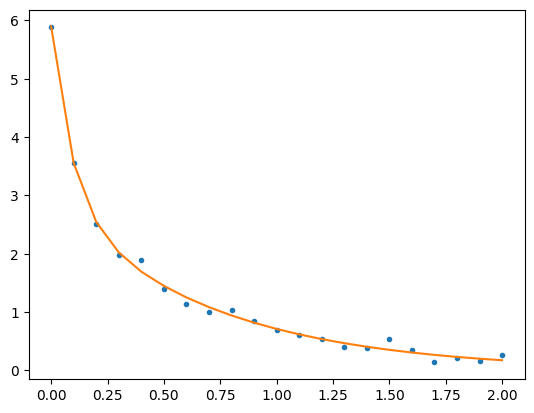

In [47]:
# TODO
plot_against_data(xstar)

## Q6. Compressing an Image with Linear Algebra (2 points for each part)

Here we'll play with the Singular Value Decomposition (SVD) function in Numpy's `linalg` submodule. You can think of the SVD as a generalization of the eigenvalue decomposition for non-square matrices.

Here we will be using the same `face` matrix as above.

 - (1) To begin, calculate the SVD using the code. (For this part, you can just copy and paste this code.)
 
     `u, s, v = np.linalg.svd(face, full_matrices=False)`

In [26]:
# TODO
u, s, v = np.linalg.svd(face, full_matrices=False)

 - (2) Calculate the shape of `u`, `s`, and `v`.

In [27]:
# TODO
u.shape


(768, 768)

In [28]:
s.shape

(768,)

In [29]:
v.shape

(768, 1024)

 - (3) Construct a matrix by matrix multiplying `u`, `s`, and `v`. Note that `s` doesn't conform as it stands. Mathematically, we want to compute 
$$
U \cdot \text{diag}(S) \cdot V.
$$
Thus, we need $\text{diag}(S)$ to be a 768 x 768 matrix with the values of `s` on the diagonal. These are the singular values---analogous to the eigenvalues---of the `face` matrix. Use `np.diag` to do this. Use `@` to perform the matrix multplication. Call this new matrix `faceUSV`.

In [31]:
# TODO
faceUSV = u@np.diag(s)@v

 - (4) Use the function `np.allclose` to test if all of the elements of the matrices `faceUSV` and `face` are numerically close. Does this verify that our reconstruction was successful? Why are we using `np.allclose` instead of, say, `faceUSV == face` to test if the matrices are the same?

In [33]:
# TODO
np.allclose(faceUSV, face)

True

`faceUSV == face` compares each entry and return an array for each. If we wanted to return a single truth value, we would use `np.array.all`. 
But still using this won't get us the desired result because `==` checks for _identical_ values. 
Instead, allclose check if the values are equal in a certain small range. 


`(faceUSV == face).all()` for example, would give False

 - (5) Now, construct a function called `compress` that takes in a number `n` and returns a matrix constructed as follows:
 
$$
U_n \cdot \text{diag}(S_n) \cdot V_n
$$
where $U_n$ is only the first `n` columns of the matrix `u`, $\text{diag}(S_n)$ is the first `n` singular values put on the diagonals of a matrix of zeros (hint: `np.diag(s[0:n])`), and $V_n$ is the first `n` rows of the matrix `v`.

In [48]:
# TODO
def compress(n):
    face_compressed = u[:, 0:n]@np.diag(s[0:n])@v[0:n, :]
    return face_compressed

 - (6) Use your newly created `compress` function to create the a matrix called `face_compressed` for various values of `n`. Plot the matrix using `plt.imshow(face_compressed, cmap=plt.cm.gray)`. Do this for `n in [500, 300, 100, 50, 10]`. What do you see happening?

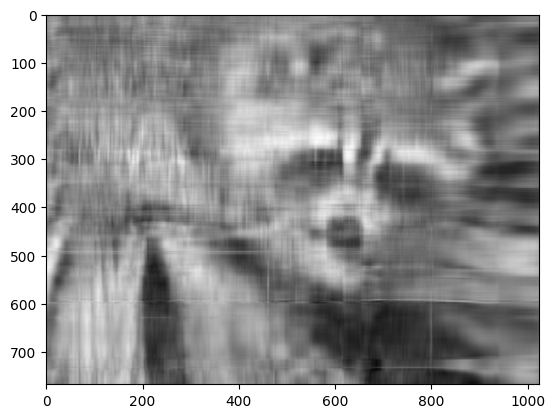

In [51]:
# TODO
for n in [500, 300, 100, 50, 10]:
    plt.imshow(compress(n), cmap= plt.cm.gray)

 - (7). Again use the `size` method to calculate the number of "pixels" (elements in the array) that are in the original `face` matrix. Now, suppose we use the SVD to store this image. Write a function called `storage_size` that computes that number of elements in $U_r$, the number of elements in $V_r$, adds them together, and then adds $n$ for the number of singular values of the $S_r$ vector used. That is
 
 $$
 storageSize = numberOfElements(U_n) + numberOfElements(V_n) + numberOfElements(S_n)
 $$

In [50]:
# TODO
def storage_size(n):
    size = u[:, 0:n].size + n + v[0:n, :].size
    # Alternatively, u[:,0:n].size + s[0:n].size + v[0:n,:].size
    return size

 - (8) Compute the storage size for each of the values of `n` that we tested above. Compared to the original size, `face.size`,
 how much space are we saving (in percentages) when we use `n=100` (which looks almost lossless)?

In [54]:
# TODO
for n in [500, 300, 100, 50, 10]:
    print(f"Original Size {face.size}; compressed {storage_size(n)}; N = {n}")

Original Size 786432; compressed 896500; N = 500
Original Size 786432; compressed 537900; N = 300
Original Size 786432; compressed 179300; N = 100
Original Size 786432; compressed 89650; N = 50
Original Size 786432; compressed 17930; N = 10


**NOTE:** Essentially, we are reconstructing the matrix (and image) using the first `n` singular values. Equivalently, we could say that we are using Principal Component Analysis and reconstructing the image using the first `n` principal components. If this were a square matrix, we could say that we are using the first `n` eigenvalues and eigenvectors.

We will later see that this same technique can be used to analyze complex data. Imagine, for example, applying this procedure to a matrix of data or to the variance-covariance matrix of a set of variables. We will later see that, in the same way that we are compressing and summarizing a complex image, we can summarize the joint distribution of a set of variables.